In [37]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")


In [38]:
tcga = pd.read_csv('../data/processed/tcga/merged_tcga.csv', index_col=0)
tcga = tcga.rename(columns={'Variant_Type': 'VariantLabel'})
tcga

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,4.974365,29.891291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP21193,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,4.019948,8.379595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP13206,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,3.909932,9.277749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP103623,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,0.682193,8.342081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP32742,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,8.076706,10.929168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,13.125604,17.631857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP122676,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,2.502007,12.565596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP88776,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,6.154079,9.255289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4


## 1. Basic Dataset Information

In [39]:
tcga

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,4.974365,29.891291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP21193,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,4.019948,8.379595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP13206,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,3.909932,9.277749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP103623,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,0.682193,8.342081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP32742,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,8.076706,10.929168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,13.125604,17.631857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP122676,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,2.502007,12.565596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP88776,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,6.154079,9.255289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4


## Mutation Types

| Label        | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| **SNV**      | *Single Nucleotide Variant* — A change in a single base pair in the DNA.   |
| **Deletion** | One or more nucleotides are removed from the DNA sequence.                 |
| **Insertion**| One or more nucleotides are added to the DNA sequence.                     |
| **None**     | No mutation detected.                                                       |
| **Substitution** | One segment of DNA is replaced with a different sequence.              |


In [40]:
tcga

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,4.974365,29.891291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP21193,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,4.019948,8.379595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP13206,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,3.909932,9.277749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP103623,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,0.682193,8.342081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP32742,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,8.076706,10.929168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,13.125604,17.631857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP122676,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,2.502007,12.565596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP88776,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,6.154079,9.255289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4


In [41]:
feature_cols = [c for c in tcga.columns if c not in ['VariantLabel', 'Mutated', 'ModelID', 'VariantType']]


In [42]:
# Display basic info about the dataset
print("=== tcga Dataset Overview ===")
print(f"Total samples: {len(tcga)}")
print(f"Total features: {len(feature_cols)}")



=== tcga Dataset Overview ===
Total samples: 1234
Total features: 55921


## 2. Distribution Analysis

In [43]:
# how many mutaded vs non-mutated samples
print("Distribution of 'Mutated' column:")
mutated_counts = tcga['Mutated'].value_counts().sort_index()
print(f"Non-mutated (0): {mutated_counts.get(0, 0)} samples ({mutated_counts.get(0, 0)/len(tcga)*100:.1f}%)")
print(f"Mutated (1): {mutated_counts.get(1, 0)} samples ({mutated_counts.get(1, 0)/len(tcga)*100:.1f}%)")

Distribution of 'Mutated' column:
Non-mutated (0): 803 samples (65.1%)
Mutated (1): 431 samples (34.9%)


### 2.1 Mutation Status Distribution

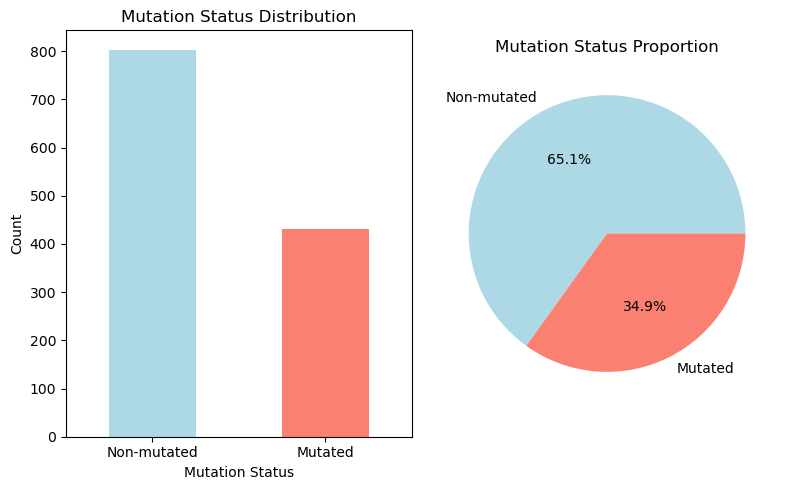

In [44]:
# Visualize mutation distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
mutated_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Mutation Status Distribution')
plt.xlabel('Mutation Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-mutated', 'Mutated'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(mutated_counts.values, labels=['Non-mutated', 'Mutated'], autopct='%1.1f%%', 
        colors=['lightblue', 'salmon'])
plt.title('Mutation Status Proportion')

plt.tight_layout()
plt.show()




Distribution of 'VariantType' column:
VariantType 0: 50 samples (4.1%)
VariantType 1: 6 samples (0.5%)
VariantType 2: 22 samples (1.8%)
VariantType 3: 353 samples (28.6%)
VariantType 4: 803 samples (65.1%)


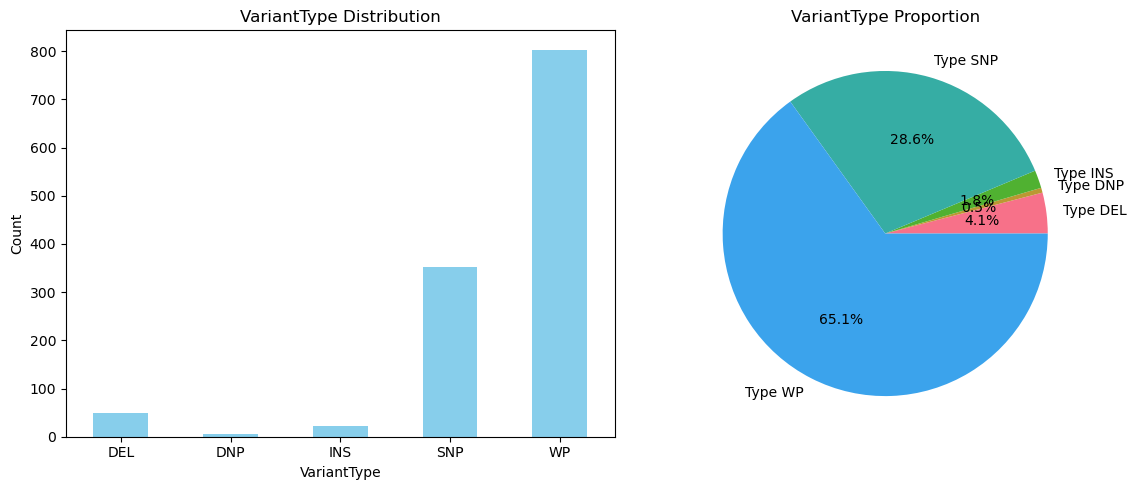

In [45]:
# Count samples for each class in 'VariantType' column
print("\nDistribution of 'VariantType' column:")
variant_counts = tcga['VariantLabel'].value_counts().sort_index()
total_samples = len(tcga)

for variant_type in range(5):  # 0 to 4
    count = variant_counts.get(variant_type, 0)
    percentage = (count / total_samples) * 100
    print(f"VariantType {variant_type}: {count} samples ({percentage:.1f}%)")

# Visualize variant type distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
variant_counts.plot(kind='bar', color='skyblue')
plt.title('VariantType Distribution')
plt.xlabel('VariantType')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(variant_counts.values, labels=[f'Type {i}' for i in variant_counts.index], 
        autopct='%1.1f%%')
plt.title('VariantType Proportion')

plt.tight_layout()
plt.show()

## 3. Feature Analysis and Distributions


### 3.1 Overall Dataset Distribution

In [46]:
tcga

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,4.974365,29.891291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP21193,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,4.019948,8.379595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP13206,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,3.909932,9.277749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP103623,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,0.682193,8.342081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP32742,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,8.076706,10.929168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,13.125604,17.631857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP122676,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,2.502007,12.565596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP88776,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,6.154079,9.255289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4


In [47]:
# Calculate mean of all features for each sample
sample_means = tcga[feature_cols].mean(axis=1)
sample_stds = tcga[feature_cols].std(axis=1)

print(f"Sample statistics (mean of features per sample):")
print(f"Mean: {sample_means.mean():.6f}")
print(f"Std: {sample_means.std():.6f}")
print(f"Min: {sample_means.min():.6f}")
print(f"Max: {sample_means.max():.6f}")


Sample statistics (mean of features per sample):
Mean: 7.865950
Std: 4.914928
Min: 3.956175
Max: 76.045224


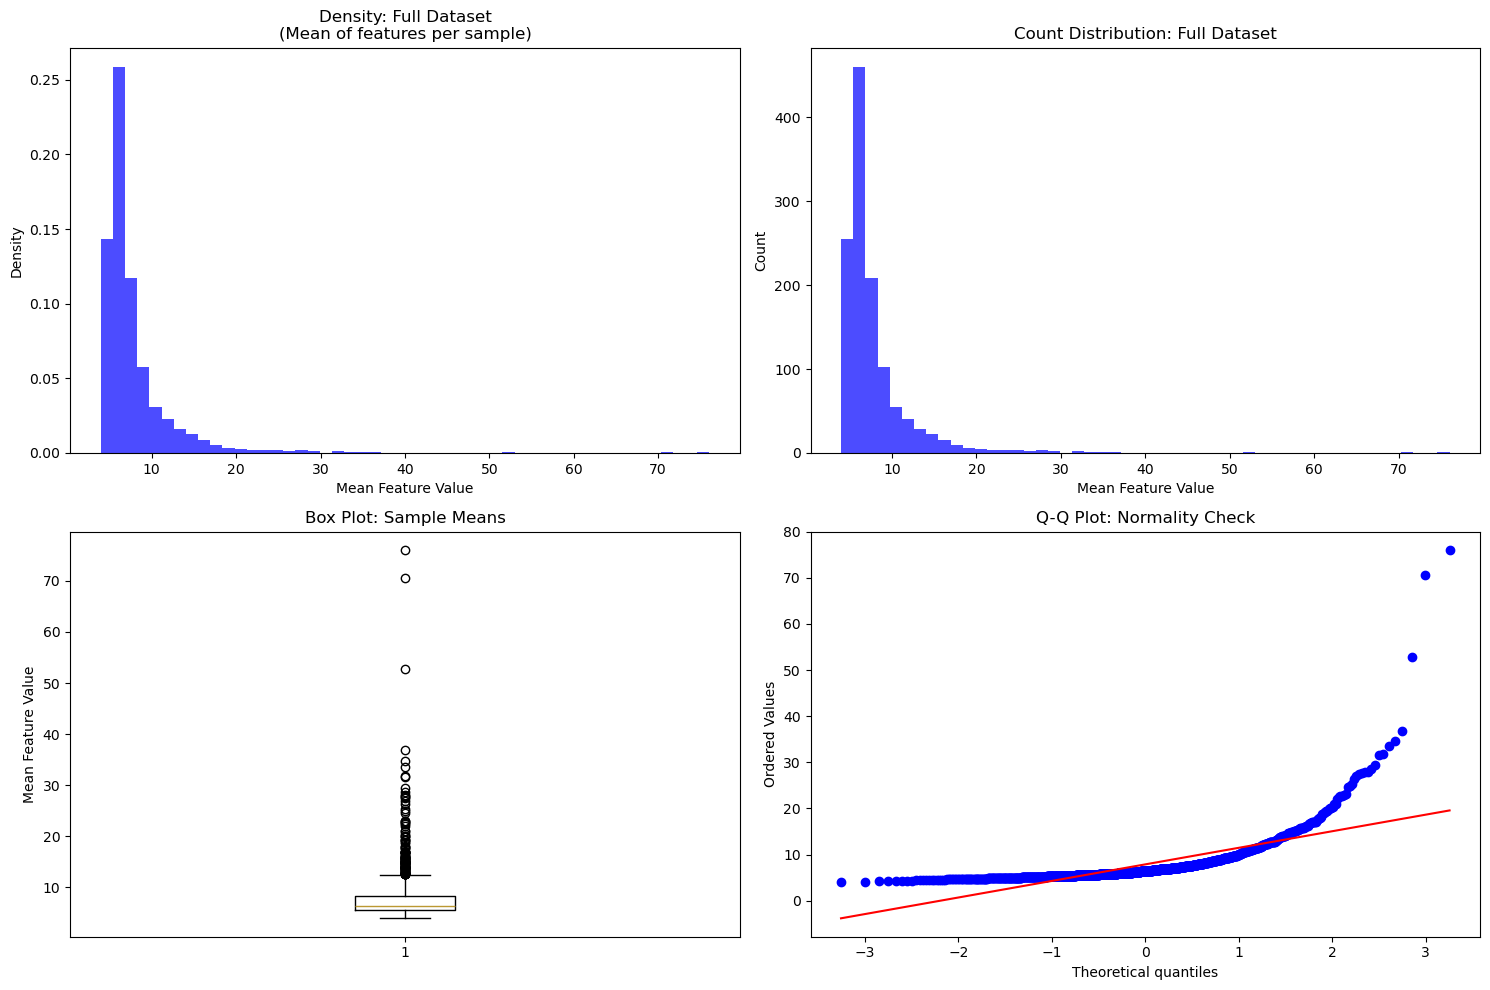

In [48]:

# Plot overall distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Density plot of full dataset
axes[0, 0].hist(sample_means, bins=50, alpha=0.7, color='blue', density=True)
axes[0, 0].set_title('Density: Full Dataset\n(Mean of features per sample)')
axes[0, 0].set_xlabel('Mean Feature Value')
axes[0, 0].set_ylabel('Density')

# Probability distribution of full dataset
axes[0, 1].hist(sample_means, bins=50, alpha=0.7, color='blue')
axes[0, 1].set_title('Count Distribution: Full Dataset')
axes[0, 1].set_xlabel('Mean Feature Value')
axes[0, 1].set_ylabel('Count')

# Box plot
axes[1, 0].boxplot(sample_means)
axes[1, 0].set_title('Box Plot: Sample Means')
axes[1, 0].set_ylabel('Mean Feature Value')

# Q-Q plot for normality check
from scipy.stats import probplot
probplot(sample_means, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Normality Check')

plt.tight_layout()
plt.show()

### 3.2 Distributions by VariantType

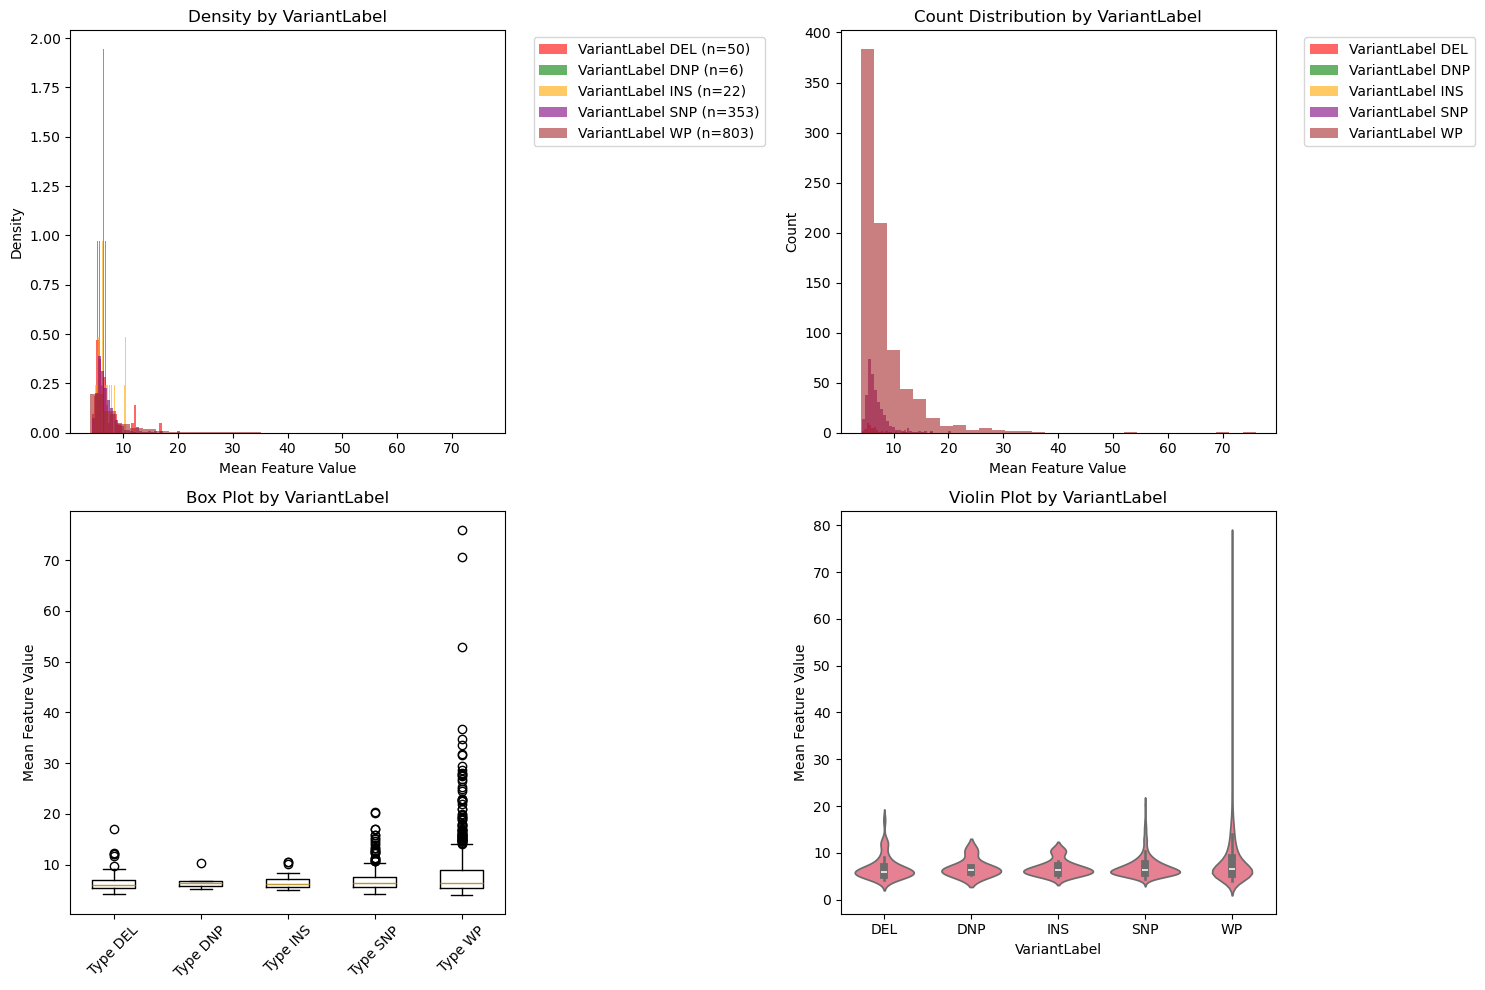

In [49]:
# Analyze distributions by VariantType
plt.figure(figsize=(15, 10))

colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink']

# Density plot by VariantType
plt.subplot(2, 2, 1)
for i, variant_type in enumerate(sorted(tcga['VariantLabel'].unique())):
    subset = tcga[tcga['VariantLabel'] == variant_type]
    if len(subset) > 0:
        subset_means = subset[feature_cols].mean(axis=1)
        plt.hist(subset_means, bins=30, alpha=0.6, 
                label=f'VariantLabel {variant_type} (n={len(subset)})',
                color=colors[i % len(colors)], density=True)

plt.title('Density by VariantLabel')
plt.xlabel('Mean Feature Value')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Count distribution by VariantType
plt.subplot(2, 2, 2)
for i, variant_type in enumerate(sorted(tcga['VariantLabel'].unique())):
    subset = tcga[tcga['VariantLabel'] == variant_type]
    if len(subset) > 0:
        subset_means = subset[feature_cols].mean(axis=1)
        plt.hist(subset_means, bins=30, alpha=0.6, 
                label=f'VariantLabel {variant_type}',
                color=colors[i % len(colors)])

plt.title('Count Distribution by VariantLabel')
plt.xlabel('Mean Feature Value')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Box plot by VariantType
plt.subplot(2, 2, 3)
variant_data = []
variant_labels = []
for variant_type in sorted(tcga['VariantLabel'].unique()):
    subset = tcga[tcga['VariantLabel'] == variant_type]
    if len(subset) > 0:
        subset_means = subset[feature_cols].mean(axis=1)
        variant_data.append(subset_means)
        variant_labels.append(f'Type {variant_type}')

plt.boxplot(variant_data, labels=variant_labels)
plt.title('Box Plot by VariantLabel')
plt.ylabel('Mean Feature Value')
plt.xticks(rotation=45)

# Violin plot by VariantType
plt.subplot(2, 2, 4)
# Create a dataframe for seaborn
plot_data = []
for variant_type in sorted(tcga['VariantLabel'].unique()):
    subset = tcga[tcga['VariantLabel'] == variant_type]
    if len(subset) > 0:
        subset_means = subset[feature_cols].mean(axis=1)
        for mean_val in subset_means:
            plot_data.append({'VariantLabel': variant_type, 'MeanValue': mean_val})

plot_df = pd.DataFrame(plot_data)
sns.violinplot(data=plot_df, x='VariantLabel', y='MeanValue')
plt.title('Violin Plot by VariantLabel')
plt.ylabel('Mean Feature Value')

plt.tight_layout()
plt.show()


### 3.3 Distributions by Mutation Status


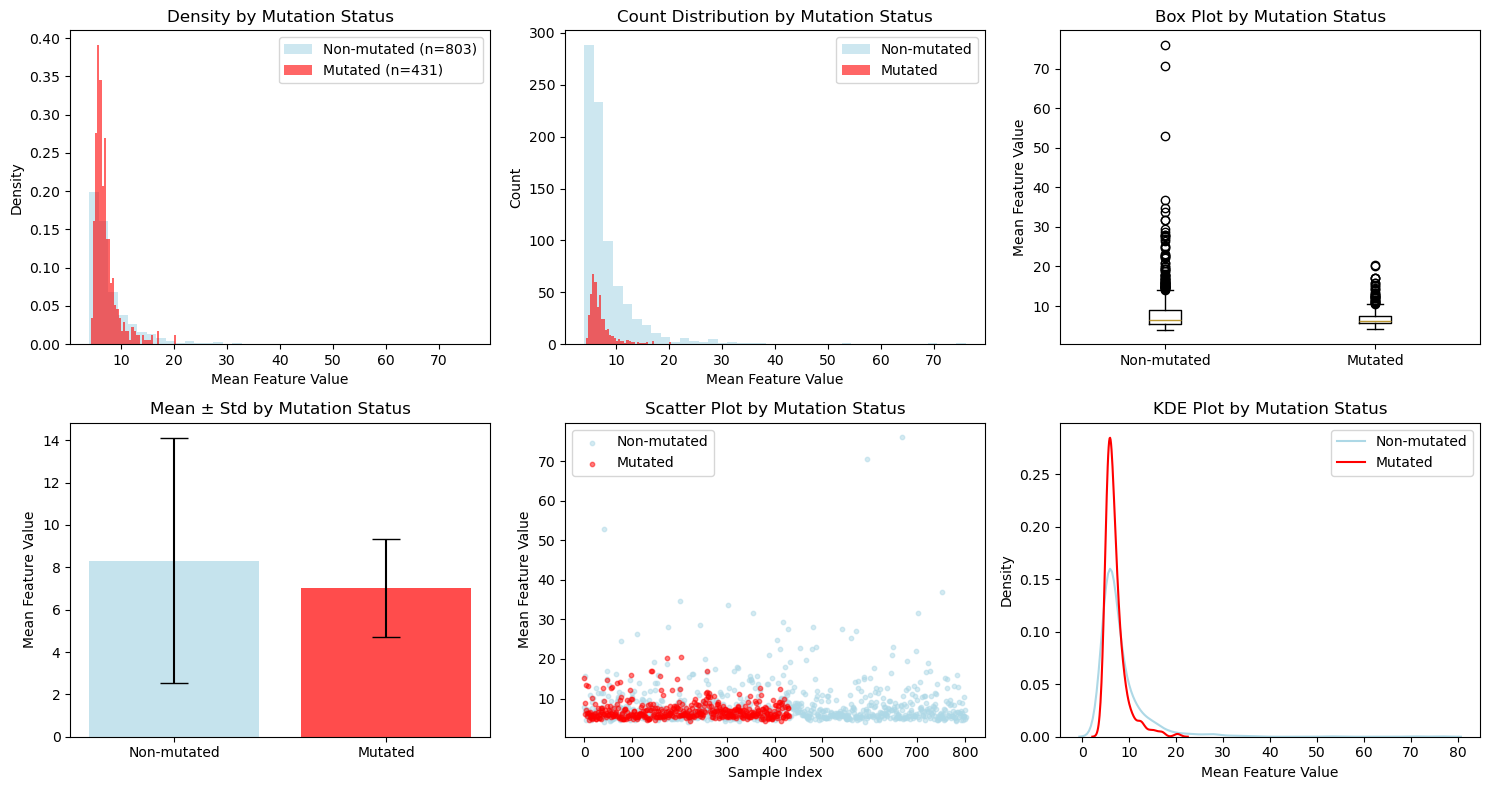

In [50]:
# Analyze distributions by mutation status
non_mutated = tcga[tcga['Mutated'] == 0]
mutated = tcga[tcga['Mutated'] == 1]

plt.figure(figsize=(15, 8))

if len(non_mutated) > 0 and len(mutated) > 0:
    non_mut_means = non_mutated[feature_cols].mean(axis=1)
    mut_means = mutated[feature_cols].mean(axis=1)
    
    # Density plot by mutation status
    plt.subplot(2, 3, 1)
    plt.hist(non_mut_means, bins=40, alpha=0.6, label=f'Non-mutated (n={len(non_mutated)})', 
             color='lightblue', density=True)
    plt.hist(mut_means, bins=40, alpha=0.6, label=f'Mutated (n={len(mutated)})', 
             color='red', density=True)
    plt.title('Density by Mutation Status')
    plt.xlabel('Mean Feature Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Count distribution by mutation status
    plt.subplot(2, 3, 2)
    plt.hist(non_mut_means, bins=40, alpha=0.6, label='Non-mutated', 
             color='lightblue')
    plt.hist(mut_means, bins=40, alpha=0.6, label='Mutated', 
             color='red')
    plt.title('Count Distribution by Mutation Status')
    plt.xlabel('Mean Feature Value')
    plt.ylabel('Count')
    plt.legend()
    
    # Box plot comparison
    plt.subplot(2, 3, 3)
    plt.boxplot([non_mut_means, mut_means], labels=['Non-mutated', 'Mutated'])
    plt.title('Box Plot by Mutation Status')
    plt.ylabel('Mean Feature Value')
    
    # Statistical comparison
    plt.subplot(2, 3, 4)
    means = [non_mut_means.mean(), mut_means.mean()]
    stds = [non_mut_means.std(), mut_means.std()]
    labels = ['Non-mutated', 'Mutated']
    
    plt.bar(labels, means, yerr=stds, capsize=10, alpha=0.7, 
            color=['lightblue', 'red'])
    plt.title('Mean ± Std by Mutation Status')
    plt.ylabel('Mean Feature Value')
    
    # Scatter plot
    plt.subplot(2, 3, 5)
    plt.scatter(range(len(non_mut_means)), non_mut_means, alpha=0.5, 
                label='Non-mutated', color='lightblue', s=10)
    plt.scatter(range(len(mut_means)), mut_means, alpha=0.5, 
                label='Mutated', color='red', s=10)
    plt.title('Scatter Plot by Mutation Status')
    plt.xlabel('Sample Index')
    plt.ylabel('Mean Feature Value')
    plt.legend()
    
    # KDE plot
    plt.subplot(2, 3, 6)
    sns.kdeplot(non_mut_means, label='Non-mutated', color='lightblue')
    sns.kdeplot(mut_means, label='Mutated', color='red')
    plt.title('KDE Plot by Mutation Status')
    plt.xlabel('Mean Feature Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

### 3.4 Statistical Testing

In [51]:
# Perform statistical tests
if len(non_mutated) > 0 and len(mutated) > 0:
    print("=== Statistical Comparison: Mutated vs Non-mutated ===")
    print(f"Non-mutated samples: {len(non_mutated)}")
    print(f"Mean feature value: {non_mut_means.mean():.6f} ± {non_mut_means.std():.6f}")
    print(f"Median: {non_mut_means.median():.6f}")
    
    print(f"\nMutated samples: {len(mutated)}")
    print(f"Mean feature value: {mut_means.mean():.6f} ± {mut_means.std():.6f}")
    print(f"Median: {mut_means.median():.6f}")
    
    # Statistical tests
    t_stat, t_p_value = stats.ttest_ind(non_mut_means, mut_means)
    u_stat, u_p_value = stats.mannwhitneyu(non_mut_means, mut_means, alternative='two-sided')
    
    print(f"\n=== Statistical Tests ===")
    print(f"T-test (parametric):")
    print(f"  t-statistic: {t_stat:.6f}")
    print(f"  p-value: {t_p_value:.6f}")
    print(f"  Significant difference: {'Yes' if t_p_value < 0.05 else 'No'}")
    
    print(f"\nMann-Whitney U test (non-parametric):")
    print(f"  U-statistic: {u_stat:.6f}")
    print(f"  p-value: {u_p_value:.6f}")
    print(f"  Significant difference: {'Yes' if u_p_value < 0.05 else 'No'}")


=== Statistical Comparison: Mutated vs Non-mutated ===
Non-mutated samples: 803
Mean feature value: 8.320133 ± 5.799120
Median: 6.465358

Mutated samples: 431
Mean feature value: 7.019755 ± 2.332593
Median: 6.338920

=== Statistical Tests ===
T-test (parametric):
  t-statistic: 4.464786
  p-value: 0.000009
  Significant difference: Yes

Mann-Whitney U test (non-parametric):
  U-statistic: 181527.000000
  p-value: 0.155352
  Significant difference: No


## 4. Feature Analysis and Filtration

 ### 4.1 Mean and Variance of Features

Variance filtering removes features whose variance across samples is too low to be informative. 

Low‐variance features:

1. Contribute little signal
If a feature hardly changes across your dataset, it can’t help distinguish between conditions or classes.

2. Often represent noise or off‐target measurements
Constant or near‐constant features may reflect background noise, batch effects, or failed probes.

3. Speed up downstream analyses
By dropping “flat” features, you shrink the size of your data matrix, making PCA, clustering, or model training faster and more stable.

4. Improve model performance
Many machine‐learning algorithms (e.g. Lasso, random forests) benefit from removing uninformative variables; fewer useless features often means less overfitting and better generalization.

In [52]:
feature_cols = [c for c in tcga.columns if c not in ['VariantType', 'Mutated', 'ModelID', "VariantLabel"]]


In [53]:
tcga

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,4.974365,29.891291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP21193,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,4.019948,8.379595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP13206,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,3.909932,9.277749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP103623,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,0.682193,8.342081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP32742,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,8.076706,10.929168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,13.125604,17.631857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4
SP122676,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,2.502007,12.565596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SNP,1,3
SP88776,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,6.154079,9.255289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WP,0,4


In [54]:
def filter_by_variance(tcga, feature_cols, threshold_percentile=25):
    # Extract data and compute per-feature mean & variance
    feature_data  = tcga[feature_cols]
    feature_means = feature_data.mean()
    feature_vars  = feature_data.var()
    print(f"Features before variance filtration: {len(feature_cols)}")

    # Mask out NaN or zero variances
    valid_mask   = ~(feature_vars.isna() | (feature_vars == 0))
    means_valid  = feature_means[valid_mask]
    vars_valid   = feature_vars[valid_mask]
    
    # Compute the variance threshold at the given percentile
    var_threshold = np.percentile(vars_valid, threshold_percentile)
    print(f"{threshold_percentile}th percentile variance threshold: {var_threshold:.6f}")
    
    # Determine which features survive the filter
    high_var_mask = vars_valid > var_threshold
    high_var_feats = vars_valid[high_var_mask].index
    print(f"Features after variance filtration: {len(high_var_feats)}")
    
    # Plot BEFORE filtering
    plt.figure(figsize=(6,5))
    plt.scatter(means_valid, vars_valid, alpha=0.6)
    plt.axhline(var_threshold, color='gray', linestyle='--',
                label=f'{threshold_percentile}th pct cutoff')
    plt.xlabel('Feature Mean')
    plt.ylabel('Feature Variance')
    plt.title('Before Variance Filtering')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot AFTER filtering
    plt.figure(figsize=(6,5))
    plt.scatter(means_valid[high_var_mask],
                vars_valid[high_var_mask],
                alpha=0.6, color='orange')
    plt.axhline(var_threshold, color='gray', linestyle='--',
                label=f'{threshold_percentile}th pct cutoff')
    plt.xlabel('Feature Mean')
    plt.ylabel('Feature Variance')
    plt.title('After Variance Filtering')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Return filtered DataFrame
    filtered = tcga[['VariantType', 'Mutated'] + list(high_var_feats)]
    return filtered

Features before variance filtration: 55921
25th percentile variance threshold: 0.007299
Features after variance filtration: 41361


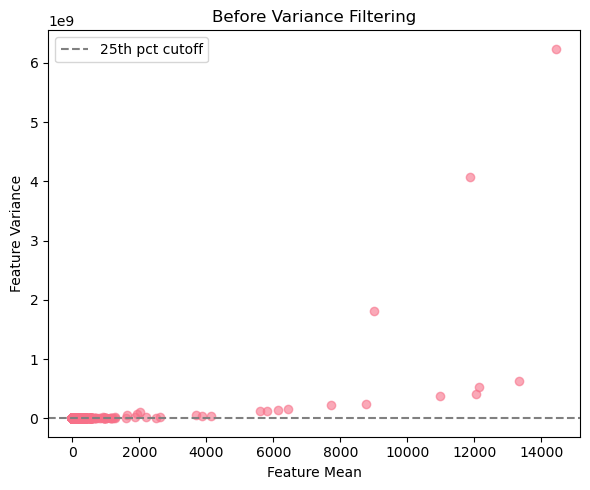

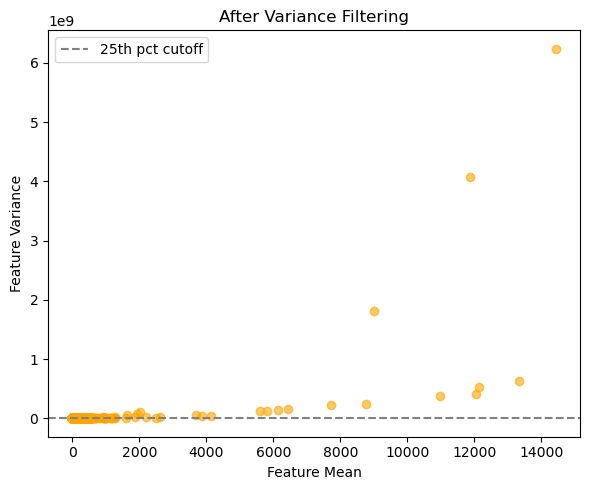

,VariantType,Mutated,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,RP11-196O16.1,RP11-465N4.5,RP11-126K1.9,RP4-671G15.2,RP11-225H22.7,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4,AP000230.1,RP11-80H18.4
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,3,1,65.515874,0.046881,63.315522,2.222857,2.565836,2.167233,1.265078,34.199996,...,0.470851,2.125342,0.078460,0.293462,0.172325,0.425798,0.014594,0.920468,0.147707,0.245060
SP21193,3,1,93.507754,0.655002,23.608843,1.933762,1.861716,3.873639,3.268175,23.050032,...,0.151107,1.325956,0.000000,0.142613,0.069787,0.122521,0.212762,0.559148,0.011216,0.000000
SP13206,4,0,15.155525,0.000000,42.136192,2.318698,2.870440,4.286835,9.066806,32.926751,...,0.325511,0.947105,0.172487,0.129030,0.000000,1.486234,0.128332,0.306602,0.027060,0.179581
SP103623,4,0,9.751670,0.188735,14.507132,2.342167,0.454312,13.098299,26.108567,25.074303,...,0.286123,1.734378,0.000000,2.835425,0.000000,1.646526,0.352509,3.958305,0.241574,1.479853
SP32742,4,0,16.048850,0.014542,45.302557,4.373694,4.125029,4.316576,16.914069,15.602162,...,0.126763,2.904306,0.097350,0.291292,0.000000,1.633601,0.027161,0.778690,0.040090,0.152030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,4,0,0.007476,0.000000,23.290497,6.466530,6.384945,235.016264,0.013622,5.548667,...,0.146246,3.984979,0.000000,0.552101,0.067542,2.892024,0.240236,4.968831,0.000000,0.432225
SP122676,3,1,9.736614,0.062405,31.444337,1.072155,1.207673,5.166039,5.904768,61.047477,...,1.478226,0.649933,0.417763,0.976595,0.229388,0.566796,0.106844,0.445552,0.000000,0.733968
SP88776,4,0,29.283034,0.000000,23.118048,3.699246,0.539174,0.450032,0.403973,25.097563,...,0.892884,3.910855,0.000000,0.232572,0.041385,0.653910,0.289141,0.211007,0.751576,1.280037


In [55]:
filtered_var = filter_by_variance(tcga, feature_cols)
filtered_var

In [ ]:
filtered_var.to_csv('../data/processed/tcga/tcga_variance_filtered.csv', index=False)


 ### 4.2 Quantiles of Features

IQR-Based Feature Filtering
This function removes features (columns) with too many extreme values, identifying outliers as values outside the IQR range (Q1−1.5×IQR, Q3+1.5×IQR).
Features are kept only if the proportion of outliers is below a set threshold (10%).
It's useful for eliminating noisy, unstable features that could degrade model performance or skew analysis.

In [59]:
def filter_by_IQR(tcga, feature_cols, iqr_multiplier=1.5, max_outlier_fraction=0.10):
  
    #iqr_multiplier: How far from the IQR a value must be to be considered an outlier (default: 1.5)
    #max_outlier_fraction: Maximum allowed fraction of outliers per feature (default: 0.25)

    feature_data = tcga[feature_cols]
    keep = []

    # Compute IQR bounds for each feature
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    for col in feature_data.columns:
        col_data = feature_data[col]
        outliers = (col_data < lower_bound[col]) | (col_data > upper_bound[col])
        num_outliers = outliers.sum()
        total = col_data.notna().sum()

        if total == 0:
            continue  # Skip features with all NaNs

        outlier_fraction = num_outliers / total

        if outlier_fraction <= max_outlier_fraction:
            keep.append(col)

    print(f"Features before IQR filtering: {len(feature_cols)}")
    print(f"Features after IQR filtering:  {len(keep)}")

    return tcga[['VariantLabel', 'Mutated', 'VariantType'] + keep]


In [60]:
filtered_quant = filter_by_IQR(tcga, feature_cols)
filtered_quant

Features before IQR filtering: 55921
Features after IQR filtering:  33601


,VariantLabel,Mutated,VariantType,TSPAN6,DPM1,SCYL3,C1orf112,FUCA2,GCLC,NFYA,...,RP11-180C16.1,RP11-80H18.4,RP13-297E16.4,LL0YNC03-29C1.1,RP13-297E16.5,BX649553.1,BX649553.3,BX649553.4,RN7SL355P,MIR3690
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,SNP,1,3,65.515874,63.315522,2.222857,2.565836,34.199996,4.974365,29.891291,...,0.525982,0.245060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP21193,SNP,1,3,93.507754,23.608843,1.933762,1.861716,23.050032,4.019948,8.379595,...,0.012289,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP13206,WP,0,4,15.155525,42.136192,2.318698,2.870440,32.926751,3.909932,9.277749,...,0.055593,0.179581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP103623,WP,0,4,9.751670,14.507132,2.342167,0.454312,25.074303,0.682193,8.342081,...,0.040721,1.479853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP32742,WP,0,4,16.048850,45.302557,4.373694,4.125029,15.602162,8.076706,10.929168,...,0.034513,0.152030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,WP,0,4,0.007476,23.290497,6.466530,6.384945,5.548667,13.125604,17.631857,...,0.124883,0.432225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP122676,SNP,1,3,9.736614,31.444337,1.072155,1.207673,61.047477,2.502007,12.565596,...,0.040393,0.733968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP88776,WP,0,4,29.283034,23.118048,3.699246,0.539174,25.097563,6.154079,9.255289,...,0.030972,1.280037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtered_quant.to_csv('../data/processed/tcga/tcga_quantile_filtered.csv', index=False)

### 4.3 related genes

###  Genes Influencing TP53 Mutations and Function

1. DNA Repair and Genomic Stability
MBD4: Loss of MBD4 function increases C:G→T:A transition mutations at CpG sites, contributing to TP53 mutations in colorectal cancers.

POLD2 & POLR2G: Alterations in these genes, involved in DNA replication and transcription, correlate with TP53 mutations and poor prognosis in certain cancers. 
PMC

2. Cell Cycle and Apoptosis Regulation
CDKN2A: Inactivation of CDKN2A disrupts cell cycle control, leading to deregulation of the TP53 pathway and contributing to tumorigenesis.

MDM2 & MDM4: Overexpression or amplification of these genes inhibits TP53 activity, undermining its tumor suppressor functions. 
Wiley Online Library

3. Epigenetic Modifiers
ING1 & ING4: These tumor suppressors interact with TP53, and their reduced expression can compromise TP53 function.

ASXL1 & SETBP1: Mutations in these genes are associated with TP53 mutations in hematological malignancies, affecting chromatin remodeling and gene expression.

4. Signal Transduction and Metabolic Pathways
TTN & MUC16: Frequent mutations in these genes are observed alongside TP53 mutations across various cancers, indicating a potential cooperative role in tumorigenesis.

PKM, HK2, PFKP, PHGDH: Altered expression of these metabolic genes is linked to TP53 mutations and may affect tumor metabolism and drug resistance.

5. RNA Processing and Splicing Factors
SRSF2: Mutations in this splicing factor co-occur with TP53 mutations, potentially affecting TP53 mRNA processing and contributing to cancer development.




In [63]:
def filter_tp53_related_genes(df):
    tp53_related_genes = [
        # DNA Repair
        "ATM", "ATR", "BRCA1", "BRCA2", "PALB2", "CHEK1", "CHEK2",
        "MLH1", "MSH2", "MSH6", "PMS2", "MBD4", "MUTYH", "FANCA", "FANCC",
        
        # Cell Cycle
        "CDKN2A", "CDKN1A", "RB1", "CCND1", "CDK4", "CDK6",
        
        # Apoptosis
        "BAX", "BAK1", "BCL2", "BCL2L1", "BBC3", "PMAIP1", "TP53AIP1",
        
        # Chromatin & Epigenetics
        "ARID1A", "SMARCA4", "SMARCB1", "KMT2D", "KMT2C",
        "SETD2", "EZH2", "DNMT3A", "TET2",
        
        # Signal Transduction
        "PIK3CA", "PTEN", "KRAS", "NRAS", "HRAS", "EGFR", "ERBB2", "MDM2", "MDM4",
        
        # Transcriptional Regulation
        "TP63", "TP73", "TP53BP1", "TP53BP2", "EP300", "CREBBP", "GATA3", "RUNX1",
        
        # Additional Associated Genes
        "ASXL1", "SETBP1", "SRSF2", "NPM1", "BAP1", "SMAD4", "CYLD",
    ]
    
    # Filter to include only the genes present in the dataframe
    filtered_genes = [gene for gene in tp53_related_genes if gene in df.columns]
    new = filtered_genes + ['VariantLabel', 'Mutated', 'VariantType']
    return df[new]


In [64]:

filtered_tp53 = filter_tp53_related_genes(tcga)
filtered_tp53


,ATM,ATR,BRCA1,BRCA2,PALB2,CHEK1,CHEK2,MLH1,MSH2,MSH6,...,ASXL1,SETBP1,SRSF2,NPM1,BAP1,SMAD4,CYLD,VariantLabel,Mutated,VariantType
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SP89389,6.569732,9.108624,3.886524,3.908210,4.948291,7.628499,4.388488,9.520382,17.373121,13.062890,...,23.873026,6.132490,59.085518,89.029166,17.570555,6.909294,3.815258,SNP,1,3
SP21193,0.445825,2.474867,2.063202,0.583858,3.835356,1.459505,1.946834,6.875077,6.114026,4.799309,...,9.791300,0.431734,32.043441,113.236000,24.934142,2.774067,2.028471,SNP,1,3
SP13206,0.763973,4.509282,4.817488,0.387751,4.746353,4.551539,19.382171,11.883434,8.296029,10.638584,...,5.438877,0.124004,67.484080,171.383636,23.434648,2.348944,3.879615,WP,0,4
SP103623,1.635594,2.185475,0.330366,0.087635,3.037028,1.385940,2.565792,6.850701,4.330649,4.176184,...,14.798682,1.730365,48.281190,235.845115,18.920058,4.701316,3.199669,WP,0,4
SP32742,2.063043,4.114447,2.884861,0.991022,4.828237,3.306363,5.625808,12.065498,15.859585,11.633724,...,12.483253,0.494456,79.600598,187.096113,26.904835,5.165915,5.095944,WP,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP16269,34.942141,6.928284,1.097584,1.697193,2.988766,0.586022,4.525833,8.074659,6.507114,3.557606,...,33.911592,14.232586,84.003093,67.634943,20.201427,8.220503,23.966768,WP,0,4
SP122676,1.449657,1.224141,1.990507,0.182774,1.947441,5.025520,3.417746,6.550922,4.949661,7.282015,...,7.288411,0.625078,56.958857,164.930449,19.977638,2.873073,10.160170,SNP,1,3
SP88776,0.934469,2.030093,3.960382,0.047049,2.227093,1.195519,1.131540,12.336226,6.271802,5.362458,...,9.566364,3.607501,42.593825,171.230453,20.992049,8.426728,5.246869,WP,0,4


In [ ]:
filtered_tp53.to_csv('../data/processed/tcga/tcga_tp53_filtered.csv', index=False)

### References

MBD4 inactivation increases C→T transition mutations and promotes gastrointestinal tumor formation
https://pubmed.ncbi.nlm.nih.gov/12417741/

Role of p53 and CDKN2A Inactivation in Human Squamous Cell Carcinoma
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1874671/

The p53 tumor suppressor is stabilized by inhibitor of growth 1 (ING1)
https://pubmed.ncbi.nlm.nih.gov/21731648/

Introduction of mutant TP53 related genes in metabolic pathways and their association with cancer progression
https://pubmed.ncbi.nlm.nih.gov/35667517/

Mutant p53 drives the development of myelodysplastic syndromes through dysregulation of pre-mRNA splicing
https://ashpublications.org/blood/article/142/Supplement%201/4582/500527/Mutant-p53-Drives-the-Development-of

